<a href="https://colab.research.google.com/github/harshitavyas04/Stellar-Analytics-24/blob/main/Stellar_Analytics_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Team Name:** CodeCrafters

**College Name:** Symbiosis Institute of Technology, Pune

In [ ]:
import numpy as np  # importing libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc
from sklearn.model_selection import cross_val_score, train_test_split, StratifiedKFold, KFold, GridSearchCV, ShuffleSplit

####Part 1: Visualization and Analysis of the dataset

In [ ]:
df = pd.read_csv('/content/astrotrain.csv')  # load the dataset into a df
df.head()  # display first 5 rows of df

SUBSURVEY      SNID              IAUC  FAKE  \
0                                            10473255  NULL                 2   
1                                             2110040  NULL                 2   
2                                             9966178  NULL                 2   
3                                            19732134  NULL                 2   
4                                             1582526  NULL                 2   

          RA       DECL  PIXSIZE  NXPIX  NYPIX  CCDNUM  ...  SIM_PEAKMAG_z  \
0  53.468451 -28.349424     0.27     -9     -9      44  ...      23.664705   
1  53.508185 -28.470810     0.27     -9     -9      50  ...      24.363064   
2  35.077432  -6.979272     0.27     -9     -9      51  ...      23.319248   
3  52.852204 -27.184372     0.27     -9     -9       3  ...      22.917084   
4  36.932302  -5.248342     0.27     -9     -9      55  ...      22.626780   

   SIM_EXPOSURE_g  SIM_EXPOSURE_r  SIM_EXPOSURE_i  SIM_EXPOSURE_z  \
0             1.0             1.0             1.0             1.0   
1             1.0             1.0             1.0             1.0   
2             1.0             1.0             1.0             1.0   
3             1.0             1.0             1.0             1.0   
4             1.0             1.0             1.0             1.0   

   SIM_GALFRAC_g  SIM_GALFRAC_r  SIM_GALFRAC_i  SIM_GALFRAC_z  \
0   2.378913e+00       1.384469       1.228777       1.400711   
1   3.254097e-14       7.968017       3.885829       3.697690   
2   5.848331e-01       0.558739       0.499326       0.525232   
3   4.299130e+00      13.111013      19.559818      34.610160   
4   2.718171e-01       0.285706       0.416343       0.543132   

   SIM_SUBSAMPLE_INDEX  
0                   -9  
1                   -9  
2                   -9  
3                   -9  
4                   -9  

[5 rows x 82 columns]

In [ ]:
numeric_df = df.select_dtypes(include='number')  # displaying range
range_values = numeric_df.max() - numeric_df.min()
for column, range_count in range_values.items():
    print(f"{column}: {range_count}")

SNID: 33592967.0
FAKE: 0.0
RA: 49.11908
DECL: 45.954773
PIXSIZE: 0.0
NXPIX: 0.0
NYPIX: 0.0
CCDNUM: 61.0
SNTYPE: 32.0
NOBS: 218.0
PTROBS_MIN: 1546221.0
PTROBS_MAX: 1546225.0
MWEBV: 0.094684168
MWEBV_ERR: 0.0157806942
REDSHIFT_HELIO: 1.38435248
REDSHIFT_HELIO_ERR: 0.14905
REDSHIFT_FINAL: 1.38375411
REDSHIFT_FINAL_ERR: 0.14905
VPEC: 0.0
VPEC_ERR: 0.0
HOSTGAL_OBJID: 16392983.0
HOSTGAL_PHOTOZ: 1.383533017
HOSTGAL_PHOTOZ_ERR: 0.13055
HOSTGAL_SPECZ: 10.1999627
HOSTGAL_SPECZ_ERR: 9.0005
HOSTGAL_SNSEP: 38.933632032
HOSTGAL_LOGMASS: 0.0
HOSTGAL_LOGMASS_ERR: 0.0
HOSTGAL_MAG_g: 83.520555
HOSTGAL_MAG_r: 84.426909
HOSTGAL_MAG_i: 10.628307
HOSTGAL_MAG_z: 11.5420655
HOSTGAL_SB_FLUXCAL_g: 928.29895
HOSTGAL_SB_FLUXCAL_r: 2037.1942
HOSTGAL_SB_FLUXCAL_i: 2805.509778706
HOSTGAL_SB_FLUXCAL_z: 3898.2307239
PEAKMJD: 882.3839999999982
SEARCH_TYPE: 0.0
SIM_MODEL_INDEX: 4.0
SIM_TYPE_INDEX: 32.0
SIM_NON1a: 403.0
SIM_LIBID: 7999.0
SIM_NGEN_LIBID: 0.0
SIM_NOBS_UNDEFINED: 0.0
SIM_SEARCHEFF_MASK: 4.0
SIM_REDSHIFT_HEL

In [ ]:
mean_values = df.mean(numeric_only = True)  # displaying mean
for column, mean_count in mean_values.items():
    print(f"{column}: {mean_count}")

SNID: 16767709.61245
FAKE: 2.0
RA: 39.835340585249995
DECL: -19.407486843900003
PIXSIZE: 0.27
NXPIX: -9.0
NYPIX: -9.0
CCDNUM: 31.5869
SNTYPE: 113.696525
NOBS: 59.514675
PTROBS_MIN: 726514.197675
PTROBS_MAX: 726572.71235
MWEBV: 0.019502506315715002
MWEBV_ERR: 0.0032504177158700002
REDSHIFT_HELIO: 0.575154355128875
REDSHIFT_HELIO_ERR: 0.01829820025
REDSHIFT_FINAL: 0.574195346313175
REDSHIFT_FINAL_ERR: 0.01829820025
VPEC: 0.0
VPEC_ERR: 0.0
HOSTGAL_OBJID: 8681069.713875
HOSTGAL_PHOTOZ: 0.5740207467145749
HOSTGAL_PHOTOZ_ERR: 0.05254762025
HOSTGAL_SPECZ: -2.894367034107625
HOSTGAL_SPECZ_ERR: -3.207728225
HOSTGAL_SNSEP: 0.903766426260875
HOSTGAL_LOGMASS: -9.0
HOSTGAL_LOGMASS_ERR: -9.0
HOSTGAL_MAG_g: 22.74234947395
HOSTGAL_MAG_r: 21.716528276437497
HOSTGAL_MAG_i: 21.182901038925
HOSTGAL_MAG_z: 20.8850207787375
HOSTGAL_SB_FLUXCAL_g: 17.40688266335535
HOSTGAL_SB_FLUXCAL_r: 45.371664179677495
HOSTGAL_SB_FLUXCAL_i: 72.03778784715598
HOSTGAL_SB_FLUXCAL_z: 96.41021226240599
PEAKMJD: 56970.734373325


In [ ]:
median_values = df.median(numeric_only = True)  # displaying median
for column, median_count in median_values.items():
    print(f"{column}: {median_count}")

SNID: 16864478.0
FAKE: 2.0
RA: 41.1577635
DECL: -27.204088
PIXSIZE: 0.27
NXPIX: -9.0
NYPIX: -9.0
CCDNUM: 32.0
SNTYPE: 120.0
NOBS: 60.0
PTROBS_MIN: 722092.0
PTROBS_MAX: 722155.5
MWEBV: 0.012528781
MWEBV_ERR: 0.0020881302
REDSHIFT_HELIO: 0.5510531249999999
REDSHIFT_HELIO_ERR: 0.0005
REDSHIFT_FINAL: 0.5501167499999999
REDSHIFT_FINAL_ERR: 0.0005
VPEC: 0.0
VPEC_ERR: 0.0
HOSTGAL_OBJID: 14566946.0
HOSTGAL_PHOTOZ: 0.53528325
HOSTGAL_PHOTOZ_ERR: 0.04844
HOSTGAL_SPECZ: 0.31622547
HOSTGAL_SPECZ_ERR: 0.0005
HOSTGAL_SNSEP: 0.7345579
HOSTGAL_LOGMASS: -9.0
HOSTGAL_LOGMASS_ERR: -9.0
HOSTGAL_MAG_g: 22.899212
HOSTGAL_MAG_r: 21.952983
HOSTGAL_MAG_i: 21.4219965
HOSTGAL_MAG_z: 21.109768000000003
HOSTGAL_SB_FLUXCAL_g: 8.923328999999999
HOSTGAL_SB_FLUXCAL_r: 21.9478045
HOSTGAL_SB_FLUXCAL_i: 35.620203000000004
HOSTGAL_SB_FLUXCAL_z: 47.380703
PEAKMJD: 56968.081000000006
SEARCH_TYPE: -9.0
SIM_MODEL_INDEX: 10.0
SIM_TYPE_INDEX: 20.0
SIM_NON1a: 2.0
SIM_LIBID: 3999.0
SIM_NGEN_LIBID: 1.0
SIM_NOBS_UNDEFINED: 0.0
SIM_

In [ ]:
std_values = df.std(numeric_only = True)  # displaying standard deviation
for column, std_count in std_values.items():
    print(f"{column}: {std_count}")

SNID: 9683793.876390815
FAKE: 0.0
RA: 14.800211976164912
DECL: 15.051050074985914
PIXSIZE: 0.0
NXPIX: 0.0
NYPIX: 0.0
CCDNUM: 17.435919782806607
SNTYPE: 12.26514935789998
NOBS: 24.18542346150001
PTROBS_MIN: 422156.8585590128
PTROBS_MAX: 422156.0902048822
MWEBV: 0.014568873536232431
MWEBV_ERR: 0.0024281455832560364
REDSHIFT_HELIO: 0.24278303015295724
REDSHIFT_HELIO_ERR: 0.02706834221608627
REDSHIFT_FINAL: 0.24266597110239635
REDSHIFT_FINAL_ERR: 0.02706834221608627
VPEC: 0.0
VPEC_ERR: 0.0
HOSTGAL_OBJID: 7273278.047739138
HOSTGAL_PHOTOZ: 0.2423354669264759
HOSTGAL_PHOTOZ_ERR: 0.020963591657053162
HOSTGAL_SPECZ: 4.5470591544161625
HOSTGAL_SPECZ_ERR: 4.310846132754608
HOSTGAL_SNSEP: 0.8842238127318741
HOSTGAL_LOGMASS: 0.0
HOSTGAL_LOGMASS_ERR: 0.0
HOSTGAL_MAG_g: 1.5260011036748145
HOSTGAL_MAG_r: 1.6053338709169747
HOSTGAL_MAG_i: 1.5067870127812764
HOSTGAL_MAG_z: 1.5396590243826995
HOSTGAL_SB_FLUXCAL_g: 32.05349965019785
HOSTGAL_SB_FLUXCAL_r: 74.50445628196518
HOSTGAL_SB_FLUXCAL_i: 112.0713809

The dataset does require normalisation since there are various features with a variety of ranges in values.

If two features of equal importance are input into the model but the values of one feature have a greater scale than the other, the model might unintentionally get more influence from the first model. This problem can be avoided by normalising the data.

In [ ]:
datatypes = df.dtypes  # to implement normalisation, all columns must be numeric
for column, datatypes in datatypes.items():
    print(f"{column}: {datatypes}")

SUBSURVEY: object
SNID: int64
IAUC: object
FAKE: int64
RA: float64
DECL: float64
PIXSIZE: float64
NXPIX: int64
NYPIX: int64
CCDNUM: int64
SNTYPE: int64
NOBS: int64
PTROBS_MIN: int64
PTROBS_MAX: int64
MWEBV: float64
MWEBV_ERR: float64
REDSHIFT_HELIO: float64
REDSHIFT_HELIO_ERR: float64
REDSHIFT_FINAL: float64
REDSHIFT_FINAL_ERR: float64
VPEC: float64
VPEC_ERR: float64
HOSTGAL_OBJID: int64
HOSTGAL_PHOTOZ: float64
HOSTGAL_PHOTOZ_ERR: float64
HOSTGAL_SPECZ: float64
HOSTGAL_SPECZ_ERR: float64
HOSTGAL_SNSEP: float64
HOSTGAL_LOGMASS: float64
HOSTGAL_LOGMASS_ERR: float64
HOSTGAL_MAG_g: float64
HOSTGAL_MAG_r: float64
HOSTGAL_MAG_i: float64
HOSTGAL_MAG_z: float64
HOSTGAL_SB_FLUXCAL_g: float64
HOSTGAL_SB_FLUXCAL_r: float64
HOSTGAL_SB_FLUXCAL_i: float64
HOSTGAL_SB_FLUXCAL_z: float64
PEAKMJD: float64
SEARCH_TYPE: int64
SIM_MODEL_NAME: object
SIM_MODEL_INDEX: int64
SIM_TYPE_INDEX: int64
SIM_TYPE_NAME: object
SIM_NON1a: int64
SIM_LIBID: int64
SIM_NGEN_LIBID: int64
SIM_NOBS_UNDEFINED: int64
SIM_SEARCH

Understanding the range, mean, median, and standard deviation of the dataset provides insights into the distribution and variability of the data.
Since the range of values in some columns is larger than others, it indicates that the features have different scales, which may affect certain machine learning algorithms. In such cases, normalization will help improve model performance and convergence.

Normalization is not always necessary and depends on the specific characteristics of the dataset and the machine learning algorithms being used.

In [ ]:
label_encoder = LabelEncoder()
df['SUBSURVEY'] = label_encoder.fit_transform(df['SUBSURVEY'])
df['IAUC'] = label_encoder.fit_transform(df['IAUC'])
df['SIM_MODEL_NAME'] = label_encoder.fit_transform(df['SIM_MODEL_NAME'])
df['SIM_TYPE_NAME'] = label_encoder.fit_transform(df['SIM_TYPE_NAME'])

In [ ]:
datatypes = df.dtypes
for column, datatypes in datatypes.items():
    print(f"{column}: {datatypes}")

SUBSURVEY: int64
SNID: int64
IAUC: int64
FAKE: int64
RA: float64
DECL: float64
PIXSIZE: float64
NXPIX: int64
NYPIX: int64
CCDNUM: int64
SNTYPE: int64
NOBS: int64
PTROBS_MIN: int64
PTROBS_MAX: int64
MWEBV: float64
MWEBV_ERR: float64
REDSHIFT_HELIO: float64
REDSHIFT_HELIO_ERR: float64
REDSHIFT_FINAL: float64
REDSHIFT_FINAL_ERR: float64
VPEC: float64
VPEC_ERR: float64
HOSTGAL_OBJID: int64
HOSTGAL_PHOTOZ: float64
HOSTGAL_PHOTOZ_ERR: float64
HOSTGAL_SPECZ: float64
HOSTGAL_SPECZ_ERR: float64
HOSTGAL_SNSEP: float64
HOSTGAL_LOGMASS: float64
HOSTGAL_LOGMASS_ERR: float64
HOSTGAL_MAG_g: float64
HOSTGAL_MAG_r: float64
HOSTGAL_MAG_i: float64
HOSTGAL_MAG_z: float64
HOSTGAL_SB_FLUXCAL_g: float64
HOSTGAL_SB_FLUXCAL_r: float64
HOSTGAL_SB_FLUXCAL_i: float64
HOSTGAL_SB_FLUXCAL_z: float64
PEAKMJD: float64
SEARCH_TYPE: int64
SIM_MODEL_NAME: int64
SIM_MODEL_INDEX: int64
SIM_TYPE_INDEX: int64
SIM_TYPE_NAME: int64
SIM_NON1a: int64
SIM_LIBID: int64
SIM_NGEN_LIBID: int64
SIM_NOBS_UNDEFINED: int64
SIM_SEARCHEFF_

In [ ]:
scaler = MinMaxScaler(feature_range=(-1, 1))  # initialize MinMaxScaler with feature range -1 to 1
normalized_data = scaler.fit_transform(df)
df = pd.DataFrame(normalized_data, columns=df.columns)  # create a new df with the normalized data

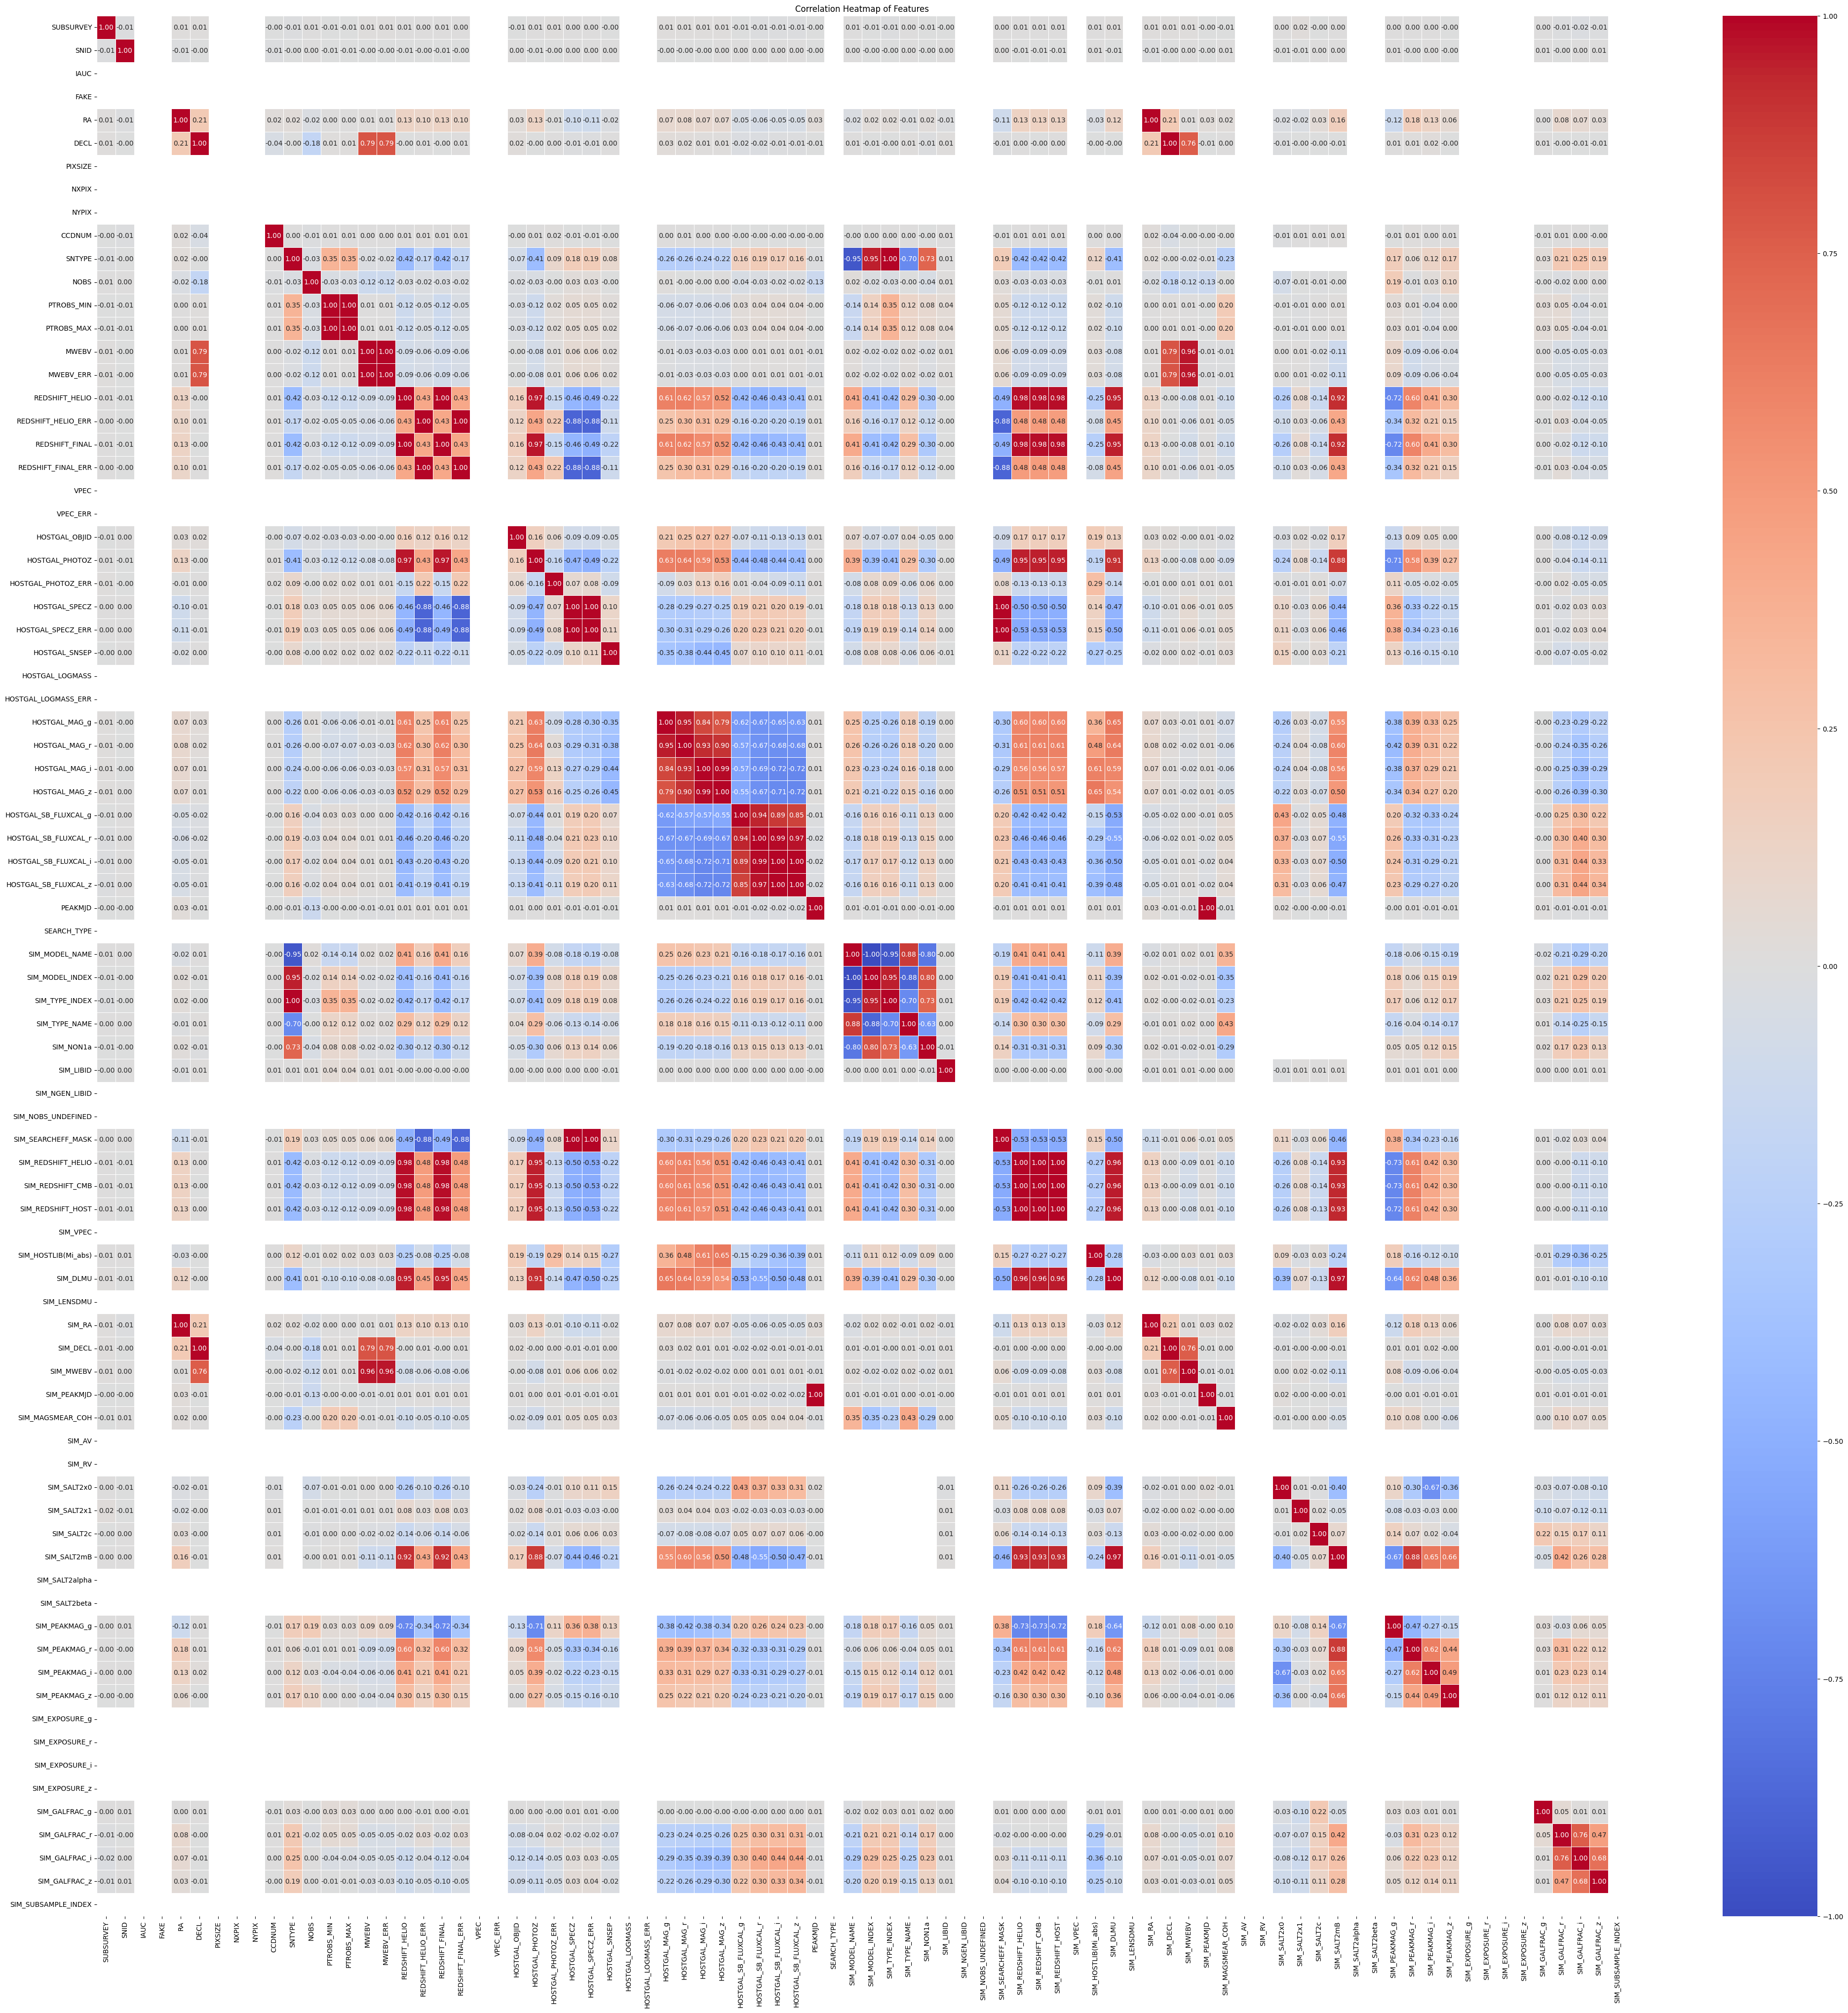

In [ ]:
correlation_matrix = df.corr()  # create a correlation matrix
plt.figure(figsize=(50, 50))  # plot heatmap
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=True, fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap of Features')
plt.show()

In [ ]:
iqr = df.quantile(0.75) - df.quantile(0.25)  # interquartile range of df
print("Interquartile Range (IQR):")
for column, iqr in iqr.items():
    print(f"{column}: {iqr}")
skewness = df.skew()  # skewness of df
print("\nSkewness:")
for column, skewness in skewness.items():
    print(f"{column}: {skewness}")

Interquartile Range (IQR):
SUBSURVEY: 0.0
SNID: 0.9964893991054735
IAUC: 0.0
FAKE: 0.0
RA: 0.6983252129315127
DECL: 1.0448018533352346
PIXSIZE: 0.0
NXPIX: 0.0
NYPIX: 0.0
CCDNUM: 1.016393442622951
SNTYPE: 1.3125
NOBS: 0.2844036697247706
PTROBS_MIN: 0.9285609883710025
PTROBS_MAX: 0.9285317466733497
MWEBV: 0.38631841281004864
MWEBV_ERR: 0.3863184643676828
REDSHIFT_HELIO: 0.5217563087689923
REDSHIFT_HELIO_ERR: 0.4708487084870848
REDSHIFT_FINAL: 0.5219799672356529
REDSHIFT_FINAL_ERR: 0.4708487084870848
VPEC: 0.0
VPEC_ERR: 0.0
HOSTGAL_OBJID: 1.8292718292942778
HOSTGAL_PHOTOZ: 0.5181407174180939
HOSTGAL_PHOTOZ_ERR: 0.47307545001914986
HOSTGAL_SPECZ: 1.8697343471657988
HOSTGAL_SPECZ_ERR: 2.0
HOSTGAL_SNSEP: 0.03363360137897553
HOSTGAL_LOGMASS: 0.0
HOSTGAL_LOGMASS_ERR: 0.0
HOSTGAL_MAG_g: 0.04082811710243062
HOSTGAL_MAG_r: 0.04615432503871475
HOSTGAL_MAG_i: 0.35872975818255914
HOSTGAL_MAG_z: 0.34297639360996457
HOSTGAL_SB_FLUXCAL_g: 0.02715416423771677
HOSTGAL_SB_FLUXCAL_r: 0.036644235979073514
H

In [ ]:
df[['HOSTGAL_SB_FLUXCAL_g', 'HOSTGAL_SB_FLUXCAL_r', 'HOSTGAL_SB_FLUXCAL_i', 'HOSTGAL_SB_FLUXCAL_z']].describe()

HOSTGAL_SB_FLUXCAL_g  HOSTGAL_SB_FLUXCAL_r  HOSTGAL_SB_FLUXCAL_i  \
count          40000.000000          40000.000000          40000.000000   
mean              -0.962497             -0.955457             -0.948688   
std                0.069059              0.073144              0.079894   
min               -1.000000             -1.000000             -1.000000   
25%               -0.989880             -0.989039             -0.986667   
50%               -0.980775             -0.978453             -0.974649   
75%               -0.962726             -0.952395             -0.944062   
max                1.000000              1.000000              1.000000   

       HOSTGAL_SB_FLUXCAL_z  
count          40000.000000  
mean              -0.950714  
std                0.076783  
min               -1.000000  
25%               -0.987808  
50%               -0.975869  
75%               -0.945481  
max                1.000000

In [ ]:
flux_columns = df[['HOSTGAL_SB_FLUXCAL_g', 'HOSTGAL_SB_FLUXCAL_r', 'HOSTGAL_SB_FLUXCAL_i', 'HOSTGAL_SB_FLUXCAL_z']]
total_flux_value = (flux_columns**2).mean(axis=1).sum()  # calculating mean square values
print("Total flux value:", total_flux_value)

Total flux value: 36655.611490722484


In [ ]:
x = np.cos(np.radians(df['DECL'])) * np.cos(np.radians(df['RA']))  # calculate cartesian coordinates
y = np.cos(np.radians(df['DECL'])) * np.sin(np.radians(df['RA']))
z = np.sin(np.radians(df['DECL']))
df['Cartesian_X'] = x
df['Cartesian_Y'] = y
df['Cartesian_Z'] = z  # add new columns for cartesian coordinates to df

####Part 2: Feature Engineering

Observing the dataset, columns 'SUBSURVEY' and 'IAUC' have only null values in them. However, they are not native numpy null values. Thus, they will now be converted into the native numpy null values.

In [ ]:
nullCols = ['SUBSURVEY', 'IAUC']
df[nullCols] = np.nan
df[nullCols].isna().sum()

SUBSURVEY    40000
IAUC         40000
dtype: int64

In [ ]:
null_values = df.isnull().sum()  # checking null values
for column, null_count in null_values.items():
    print(f"{column}: {null_count}")

SUBSURVEY: 40000
SNID: 0
IAUC: 40000
FAKE: 0
RA: 0
DECL: 0
PIXSIZE: 0
NXPIX: 0
NYPIX: 0
CCDNUM: 0
SNTYPE: 0
NOBS: 0
PTROBS_MIN: 0
PTROBS_MAX: 0
MWEBV: 0
MWEBV_ERR: 0
REDSHIFT_HELIO: 0
REDSHIFT_HELIO_ERR: 0
REDSHIFT_FINAL: 0
REDSHIFT_FINAL_ERR: 0
VPEC: 0
VPEC_ERR: 0
HOSTGAL_OBJID: 0
HOSTGAL_PHOTOZ: 0
HOSTGAL_PHOTOZ_ERR: 0
HOSTGAL_SPECZ: 0
HOSTGAL_SPECZ_ERR: 0
HOSTGAL_SNSEP: 0
HOSTGAL_LOGMASS: 0
HOSTGAL_LOGMASS_ERR: 0
HOSTGAL_MAG_g: 0
HOSTGAL_MAG_r: 0
HOSTGAL_MAG_i: 0
HOSTGAL_MAG_z: 0
HOSTGAL_SB_FLUXCAL_g: 0
HOSTGAL_SB_FLUXCAL_r: 0
HOSTGAL_SB_FLUXCAL_i: 0
HOSTGAL_SB_FLUXCAL_z: 0
PEAKMJD: 0
SEARCH_TYPE: 0
SIM_MODEL_NAME: 0
SIM_MODEL_INDEX: 0
SIM_TYPE_INDEX: 0
SIM_TYPE_NAME: 0
SIM_NON1a: 0
SIM_LIBID: 0
SIM_NGEN_LIBID: 0
SIM_NOBS_UNDEFINED: 0
SIM_SEARCHEFF_MASK: 0
SIM_REDSHIFT_HELIO: 0
SIM_REDSHIFT_CMB: 0
SIM_REDSHIFT_HOST: 0
SIM_VPEC: 0
SIM_HOSTLIB(Mi_abs): 0
SIM_DLMU: 0
SIM_LENSDMU: 0
SIM_RA: 0
SIM_DECL: 0
SIM_MWEBV: 0
SIM_PEAKMJD: 0
SIM_MAGSMEAR_COH: 0
SIM_AV: 0
SIM_RV: 0
SIM_SALT2x0: 21

In [ ]:
for column, null_count in null_values.items():
    if null_count > 0:
      print(f"{column}: {null_count}")

SUBSURVEY: 40000
IAUC: 40000
SIM_SALT2x0: 21749
SIM_SALT2x1: 21749
SIM_SALT2c: 21749
SIM_SALT2mB: 21749
SIM_SALT2alpha: 21749
SIM_SALT2beta: 21749


In [ ]:
null_percentages = (df.isnull().mean() * 100).round(2)
null_df = pd.DataFrame({'Feature': null_percentages.index, 'Null Percentage': null_percentages.values})
sorted_null_df = null_df.sort_values(by='Null Percentage', ascending=False)
print(sorted_null_df)

               Feature  Null Percentage
0            SUBSURVEY           100.00
2                 IAUC           100.00
68       SIM_SALT2beta            54.37
63         SIM_SALT2x0            54.37
64         SIM_SALT2x1            54.37
..                 ...              ...
27       HOSTGAL_SNSEP             0.00
26   HOSTGAL_SPECZ_ERR             0.00
25       HOSTGAL_SPECZ             0.00
24  HOSTGAL_PHOTOZ_ERR             0.00
84         Cartesian_Z             0.00

[85 rows x 2 columns]


<ipython-input-22-ec24b5d696a9>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Feature', y='Null Percentage',data =sorted_null_df,  palette='viridis')


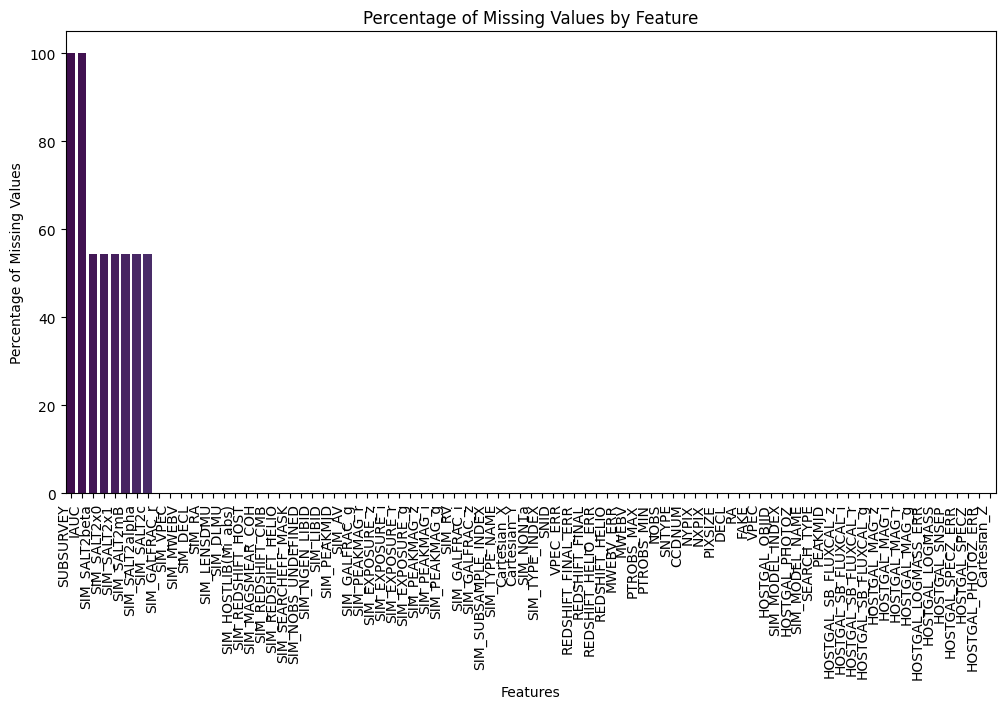

In [ ]:
plt.figure(figsize=(12, 6))  # bar plot of null percentages
sns.barplot(x='Feature', y='Null Percentage',data =sorted_null_df,  palette='viridis')
plt.xticks(rotation=90, ha='right')
plt.title('Percentage of Missing Values by Feature')
plt.xlabel('Features')
plt.ylabel('Percentage of Missing Values')
plt.show()

In [ ]:
unique_values = df.nunique()  # finding the number of unique values
for column, unique_count in unique_values.items():
    print(f"{column}: {unique_count}")

SUBSURVEY: 0
SNID: 40000
IAUC: 0
FAKE: 1
RA: 7075
DECL: 7075
PIXSIZE: 1
NXPIX: 1
NYPIX: 1
CCDNUM: 59
SNTYPE: 7
NOBS: 197
PTROBS_MIN: 39737
PTROBS_MAX: 39723
MWEBV: 7073
MWEBV_ERR: 7072
REDSHIFT_HELIO: 39960
REDSHIFT_HELIO_ERR: 1535
REDSHIFT_FINAL: 39958
REDSHIFT_FINAL_ERR: 1535
VPEC: 1
VPEC_ERR: 1
HOSTGAL_OBJID: 12411
HOSTGAL_PHOTOZ: 39964
HOSTGAL_PHOTOZ_ERR: 1844
HOSTGAL_SPECZ: 25726
HOSTGAL_SPECZ_ERR: 2
HOSTGAL_SNSEP: 35694
HOSTGAL_LOGMASS: 1
HOSTGAL_LOGMASS_ERR: 1
HOSTGAL_MAG_g: 39674
HOSTGAL_MAG_r: 39688
HOSTGAL_MAG_i: 39689
HOSTGAL_MAG_z: 39694
HOSTGAL_SB_FLUXCAL_g: 39982
HOSTGAL_SB_FLUXCAL_r: 39983
HOSTGAL_SB_FLUXCAL_i: 39973
HOSTGAL_SB_FLUXCAL_z: 39973
PEAKMJD: 34022
SEARCH_TYPE: 1
SIM_MODEL_NAME: 2
SIM_MODEL_INDEX: 2
SIM_TYPE_INDEX: 7
SIM_TYPE_NAME: 8
SIM_NON1a: 48
SIM_LIBID: 7077
SIM_NGEN_LIBID: 1
SIM_NOBS_UNDEFINED: 1
SIM_SEARCHEFF_MASK: 2
SIM_REDSHIFT_HELIO: 39954
SIM_REDSHIFT_CMB: 39959
SIM_REDSHIFT_HOST: 5504
SIM_VPEC: 1
SIM_HOSTLIB(Mi_abs): 10902
SIM_DLMU: 39296
SIM_LENSD

In [ ]:
non_unique_columns = ['SUBSURVEY', 'IAUC', 'FAKE','PIXSIZE','NXPIX','NYPIX','VPEC','VPEC_ERR','HOSTGAL_LOGMASS','HOSTGAL_LOGMASS_ERR','SEARCH_TYPE',
                      'SIM_NGEN_LIBID', 'SIM_NOBS_UNDEFINED','SIM_VPEC','SIM_LENSDMU','SIM_AV','SIM_RV','SIM_SALT2alpha','SIM_SALT2beta','SIM_EXPOSURE_g',
                      'SIM_EXPOSURE_r', 'SIM_EXPOSURE_i','SIM_EXPOSURE_z','SIM_SUBSAMPLE_INDEX']
df.drop(columns=non_unique_columns, inplace=True)  # columns that have only one unique value are probably irrelevant and therefore will be dropped

After dealing with the non unique values, only the null values are left to be dealt with.Therefore using KNN Imputer as it takes into account the relationships and patterns in the data and adapts to local patterns by considering the nearest neighbors for each data point individually, allowing it to capture variations in different regions of the dataset.


In [ ]:
columns_to_impute = ['SIM_SALT2x0','SIM_SALT2x1','SIM_SALT2c','SIM_SALT2mB']
subset_df = df[columns_to_impute]

In [ ]:
imputer = KNNImputer()  # initialize KNNImputer
imputed_values = imputer.fit_transform(subset_df)  # fit and transform the imputer on the subset of columns
for i, col in enumerate(columns_to_impute):
    df[col] = imputed_values[:, i]

In [ ]:
df.isna().sum().sum() # number of null values

0

In [ ]:
df.duplicated().sum()  # number of duplicates

0

Here we have first used KNN Imputer to address the null vallues of the dataset and then applied feature reduction as it ensures that all available information is considered and no data points are lost when assessing the relevance of features.

Using Principal Component Analysis for feature reduction since it reduces number of features while retaining the most significant information by capturing the variance in the data.

In [ ]:
target_column = 'SNTYPE'  # setting the target column
X = df.drop(columns=[target_column])  # extract features and target
y = df[target_column]
pca = PCA(n_components=40)  # apply PCA with 40 components
X_pca = pca.fit_transform(X)

In [ ]:
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance_ratio = explained_variance_ratio.cumsum()
cumulative_variance_ratio

array([0.30453787, 0.49036874, 0.57080181, 0.63757496, 0.703171  ,
       0.75696913, 0.80549268, 0.85058352, 0.87522618, 0.89984387,
       0.92376546, 0.93903219, 0.95124301, 0.96087596, 0.96850788,
       0.97469234, 0.97977957, 0.98396245, 0.98703804, 0.98970666,
       0.9918541 , 0.99377984, 0.99568762, 0.99675029, 0.99753022,
       0.99809745, 0.99851489, 0.998784  , 0.99903288, 0.99926804,
       0.99944066, 0.99958263, 0.99968506, 0.9997722 , 0.99983194,
       0.99986813, 0.99990098, 0.99992814, 0.99994429, 0.99995878])

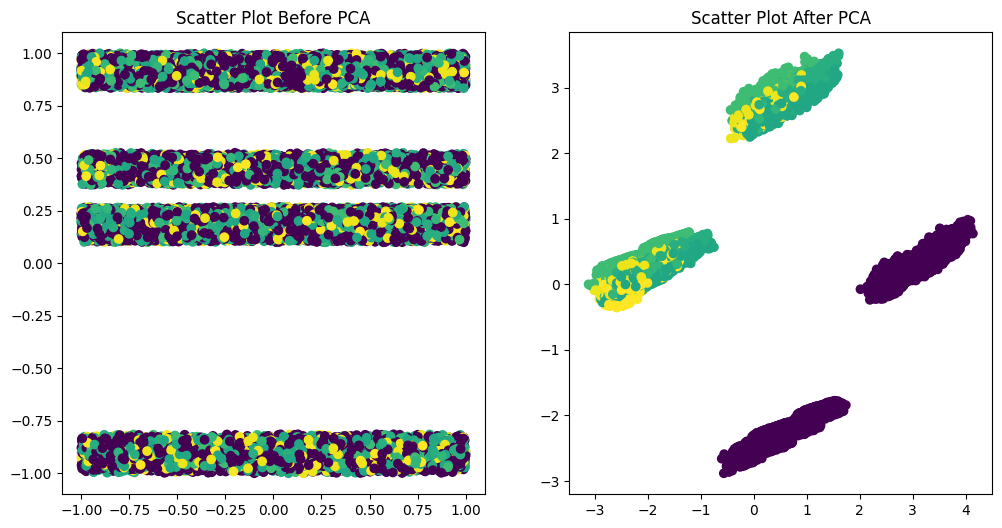

In [ ]:
plt.figure(figsize=(12, 6))  # plot scatter plot before and after PCA
plt.subplot(1, 2, 1), plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, cmap='viridis', label='Before PCA'), plt.title('Scatter Plot Before PCA')
plt.subplot(1, 2, 2), plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', label='After PCA'), plt.title('Scatter Plot After PCA')
plt.show()

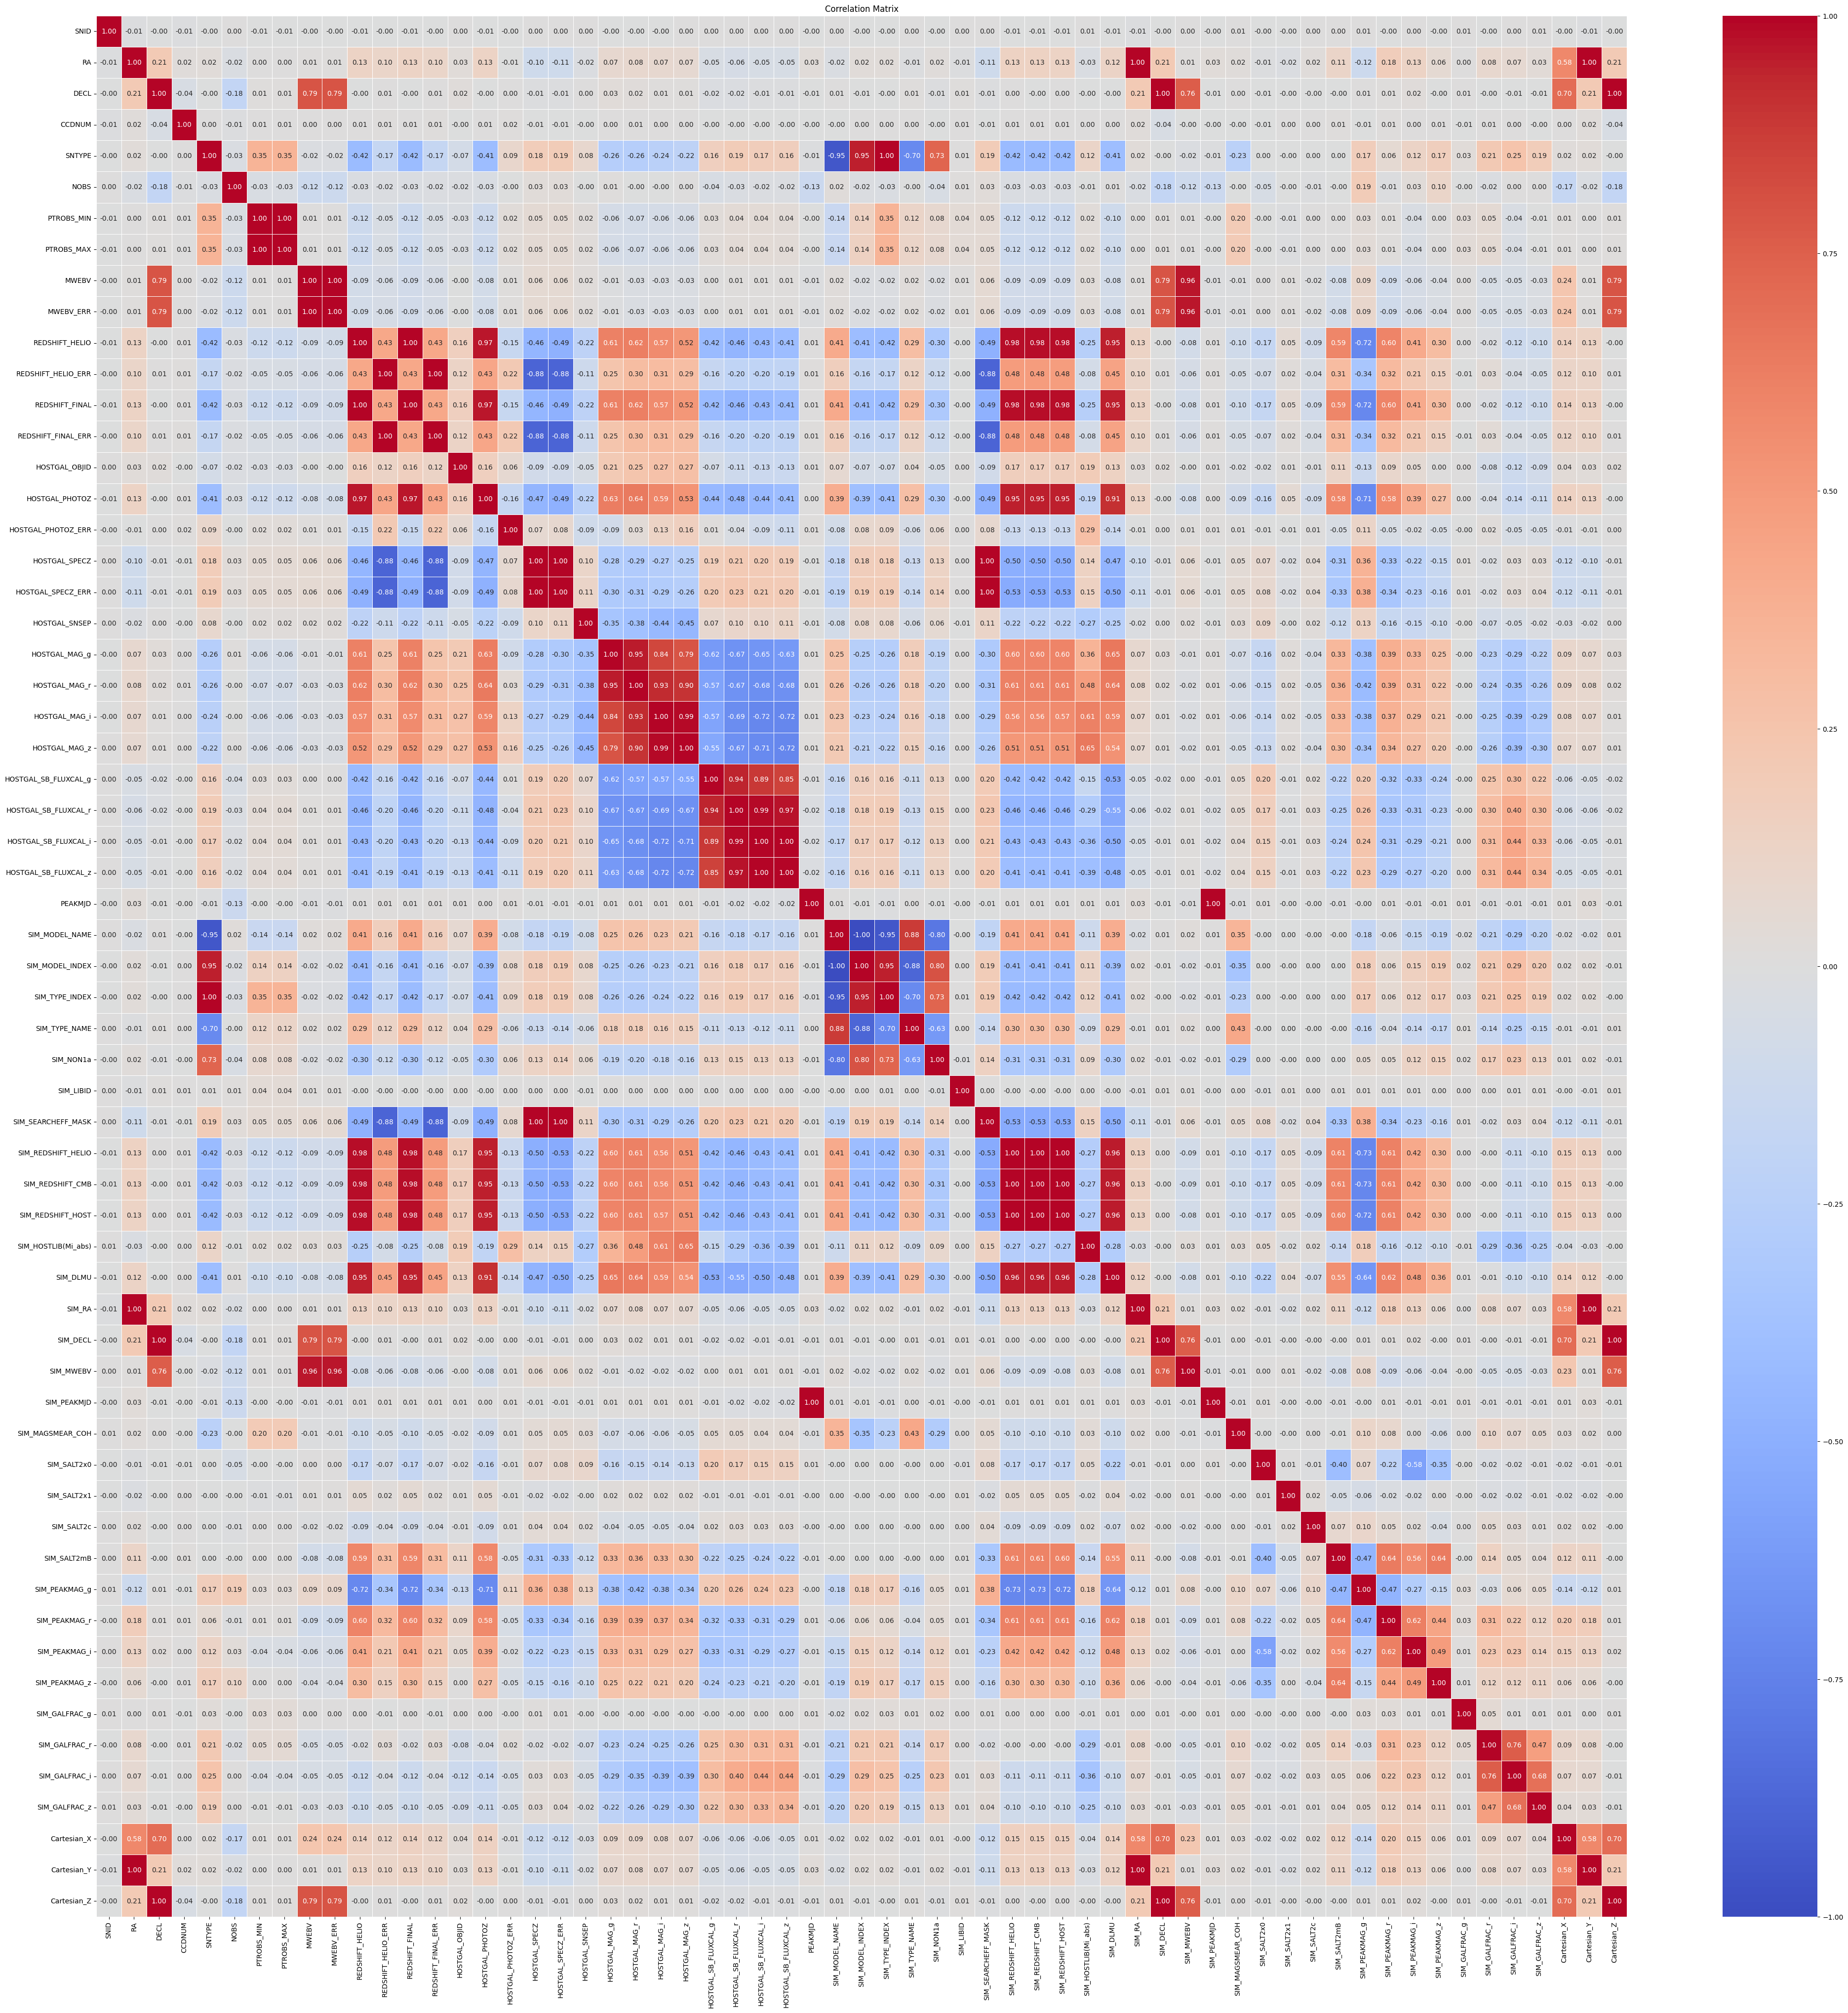

In [ ]:
correlation_matrix = df.corr()  # visualize the correlation matrix
plt.figure(figsize=(50, 50))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=True, fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

####Part 3: Supernovae Classification

'SNTYPE' and 'SIM_MODEL_INDEX' have a correlation of 0.95, and 'SNTYPE' and 'SIM_MODEL_NAME' have a correlation of -0.95.  

'SNTYPE' and 'SIM_TYPE_INDEX' have a correlation of 1.00, and 'SNTYPE' and 'SIM_TYPE_NAME' have a correlation of -0.70.

But, 'SIM_MODEL_INDEX' and 'SIM_MODEL_NAME' give the same information, and the same can be said for 'SIM_TYPE_INDEX' and 'SIM_TYPE_NAME'. Therefore, 'SIM_MODEL_NAME' and 'SIM_TYPE_NAME' are not considered as a feature of target variable.


In [ ]:
col = ['PTROBS_MIN', 'PTROBS_MAX', 'REDSHIFT_HELIO', 'REDSHIFT_FINAL', 'HOSTGAL_PHOTOZ', 'SIM_REDSHIFT_HELIO',
       'SIM_REDSHIFT_CMB', 'SIM_REDSHIFT_HOST', 'SIM_DLMU', 'SIM_MODEL_INDEX', 'SIM_TYPE_INDEX']
x = df[col]  # features selected on the basis of correlation with 'sntype'
y = df['SNTYPE']  # target variable

In [ ]:
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y_encoded, test_size=0.33, stratify=y, random_state=42)  # train test split - stratified technique

Reasons for using KNN Classifier:

1. KNN is relatively easy to understand and implement compared to other algorithms. This is beneficial for obtaining a quick solution and to avoid complex models.

2. We only need the most likely class prediction and not class probabilities. Thus, KNN is sufficient.

3. KNN can work with imbalanced datasets to some extent, which is helpful if the data has uneven class distributions.

In [ ]:
classifier = KNeighborsClassifier()
classifier.fit(x_train, y_train)  # training model
y_pred = classifier.predict(x_test)
y_train_pred = classifier.predict(x_train)
training_accuracy = accuracy_score(y_train, y_train_pred)  # calculating training and testing accuracy
print("Training Accuracy:", training_accuracy)
testing_accuracy = accuracy_score(y_test, y_pred)
print("Testing Accuracy:", testing_accuracy)

Training Accuracy: 0.9987686567164179
Testing Accuracy: 0.9959848484848485


Justification for use of GridSearchCV for fine-tuning the hyperparameters in KNN Classifier:

1. It is suitable for datasets of our size.

2. It provides a clear understanding of how each parameter affects performance.

3. Exhaustively searches a predefined grid of hyperparameter combinations.

4. Guarantees finding the best combination within the defined grid.

5. Easy to use and understand.

In [ ]:
param_grid = {'n_neighbors': range(1, 15, 2), 'weights': ['uniform', 'distance'], 'metric': ['euclidean', 'manhattan'],}
knn = KNeighborsClassifier()  # create classifier and GridSearchCV
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')
grid_search.fit(x_train, y_train)  # fit the model
best_params = grid_search.best_params_  # get best parameters and score
best_score = grid_search.best_score_
print(f"Best parameters: {best_params}")
print(f"Best score: {best_score}")

Best parameters: {'metric': 'manhattan', 'n_neighbors': 9, 'weights': 'distance'}
Best score: 0.9980223880597014


In [ ]:
optimizedKnn = KNeighborsClassifier(n_neighbors=9, metric='manhattan', weights='distance')  # create optimized KNN model using recommended parameters from above cell
optimizedKnn.fit(x_train, y_train)  # train the model on your training data
y_op_pred = optimizedKnn.predict(x_test)
y_train_op_pred = optimizedKnn.predict(x_train)
training_accuracy_op = accuracy_score(y_train, y_train_op_pred)
print("Training Accuracy:", training_accuracy_op)
testing_accuracy_op = accuracy_score(y_test, y_op_pred)
print("Testing Accuracy:", testing_accuracy_op)

Training Accuracy: 1.0
Testing Accuracy: 0.998030303030303


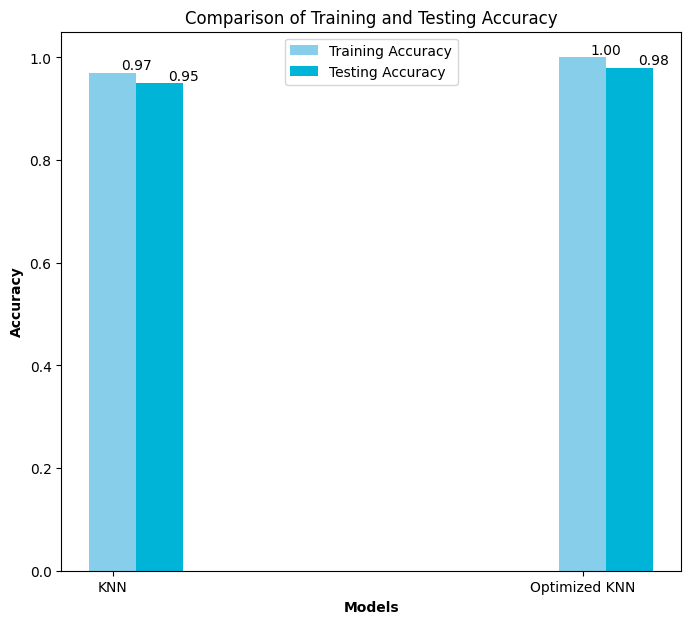

In [ ]:
models = ['KNN', 'Optimized KNN']
train_acc = [0.97, 1.00]
test_acc = [0.95, 0.98]
pos = [i - 0.05 for i in range(len(models))]  # calculate the center positions for the bars
width = 0.1
fig, ax = plt.subplots(figsize=(8, 7))
plt.bar(pos, train_acc, width, color='#87ceeb', label='Training Accuracy')  # plot the bars with centered positions
plt.bar([p + width for p in pos], test_acc, width, color='#00b4d8', label='Testing Accuracy')
plt.xlabel('Models', fontweight='bold'), plt.ylabel('Accuracy', fontweight='bold') # add labels, title, and legend
plt.title('Comparison of Training and Testing Accuracy'), plt.xticks(pos, models)  # set the x-ticks to the centered positions and labels
for i, (acc, label) in enumerate(zip([train_acc, test_acc], ['Training', 'Testing'])):  # annotate the bars with accuracy values rounded to 2 decimal places
    for j, value in enumerate(acc):
        x = pos[j] + (width / 2 if label == 'Training' else 1.5 * width)
        y = value
        ha = 'center'
        va = 'bottom'
        plt.text(x, y, f"{value:.2f}", ha=ha, va=va)
plt.legend(loc='upper center')  # add a legend
plt.show()  # show the plot

In [ ]:
conf_matrix = confusion_matrix(y_test, y_op_pred)  # plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title('Confusion Matrix'), plt.xlabel('Predicted labels'), plt.ylabel('True labels')
plt.show()

K-fold Cross Validation:

1. Splits the dataset into k roughly equal folds.

2. Iteratively uses each fold as the testing set while the remaining folds are used for training.

3. Repeats this process for all k folds.

In [ ]:
kfold = KFold(n_splits=5, shuffle=True)  # k fold cv
kAccuracy = 0
for train_index, test_index in kfold.split(x):
    x_train, x_test = df.iloc[train_index], df.iloc[test_index]
    y_train, y_test = y_encoded[train_index], y_encoded[test_index]
    model = KNeighborsClassifier(n_neighbors=9, metric='manhattan', weights='distance')  # train model
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)  # predict on test set
    accuracy = accuracy_score(y_test, y_pred)  # calculate accuracy for this fold
    kAccuracy += accuracy
average_accuracy = kAccuracy / kfold.n_splits  # calculate average accuracy
print("K-Fold average accuracy:", average_accuracy)

Stratified K-fold Cross Validation:

1. Stratifies the data before splitting into folds, ensuring each fold has the same proportion of samples from each class as the entire dataset.

2. Otherwise, the process is similar to K-Fold.

In [ ]:
stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True)  # stratified k fold cv
skAccuracy = 0
for train_index, test_index in stratified_kfold.split(x, y_encoded):
    x_train, x_test = df.iloc[train_index], df.iloc[test_index]
    y_train, y_test = y_encoded[train_index], y_encoded[test_index]
    model = KNeighborsClassifier(n_neighbors=9, metric='manhattan', weights='distance')  # train model
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)  # predict on test set
    accuracy = accuracy_score(y_test, y_pred)  # calculate accuracy for this fold
    skAccuracy += accuracy
average_accuracy = skAccuracy / stratified_kfold.n_splits  # calculate average accuracy
print("Stratified K-Fold average accuracy:", average_accuracy)

Monte Carlo Cross Validation:

1. Evaluates the model's performance on the testing set using a chosen metric.

2. Repeats steps multiple times, each time generating a new training and testing set through random splitting.

3. Collects and analyzes the performance metric from each iteration to get a reliable estimate of the model's generalizability.

In [ ]:
test_size = 0.33  # monte carlo cv
n_iter = 10  # define test size and number of iterations
scores = []  # list to store accuracies
cv = ShuffleSplit(n_splits=n_iter, test_size=test_size, random_state=42)  # initialize ShuffleSplit object
for train_index, test_index in cv.split(x):
    x_train, x_test = df.iloc[train_index], df.iloc[test_index]
    y_train, y_test = y_encoded[train_index], y_encoded[test_index]
    model = KNeighborsClassifier(n_neighbors=9, metric='manhattan', weights='distance')  # train model
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    scores.append(accuracy)
print("Average Accuracy:", np.mean(scores))  # print average accuracy and standard deviation
print("Standard Deviation:", np.std(scores))

In [ ]:
data = [0.9846, 0.9847, 0.9828]  # data and  cv models
models = ['K-Fold', 'Stratified K-Fold', 'Monte Carlo']
plt.figure(figsize=(10, 8))  # create a bar plot
bars = plt.bar(x=models, height=data, color='#87ceeb')  # use 'height' for clarity
plt.xlabel('Cross-Validation Technique'), plt.ylabel('Accuracy')  # add labels and title
plt.title('Comparison of Cross-Validation Accuracies')
for bar, value in zip(bars, data):  # annotate each bar with its accuracy
    x = bar.get_x() + bar.get_width() / 2  # centered x-coordinate
    y = value + 0.01  # adjust y-position slightly above the bar
    plt.text(x, y, f"{value:.4f}", ha='center', va='bottom', fontsize=12)  # formatted with 4 decimal places
plt.xticks(rotation=0)  # center labels on bars, align horizontal labels
plt.tight_layout()  # adjust layout to prevent overlapping
plt.ylim(0, 1.26)
plt.show()